In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
import warnings
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_similarity_score
from nltk.metrics import jaccard_distance
warnings.simplefilter('ignore')

In [382]:
def fitter(name):
    res = []
    param = []
    if name == 'kmeans':
        for i in range(350, 450):
            kmeans = KMeans(n_clusters=i,n_jobs=-1, random_state=666)
            labels = kmeans.fit_predict(matrix)
            res.append(silhouette_score(matrix, labels))
            param.append(i)
        print(np.array(res).mean(), param[np.array(res).argmax()])
    elif name=='spectral':
        for i in range(350, 450):
            model = SpectralClustering(n_clusters=i,n_jobs=-1, random_state=666)
            labels = model.fit_predict(matrix)
            res.append(silhouette_score(matrix, labels))
            param.append(i)
        print(np.array(res).mean(), param[np.array(res).argmax()])
    elif name=='aglomerative':
        for i in range(350, 450):
            model = AgglomerativeClustering(n_clusters=i)
            labels = model.fit_predict(matrix)
            res.append(silhouette_score(matrix, labels))
            param.append(i)
        print(np.array(res).mean(), param[np.array(res).argmax()])

In [261]:
def target_setter(row, number):
    """setting target val"""
    if row['msisdn']==number:
        return new_dict[number]
    else:
        return row['target']

In [262]:
def new_coords(row, coord_param):
    """transform coords"""
    if coord_param == 'long':
        return row[coord_param] + row['max_dist']/1000/2 * np.sin(row['end_angle'] - row['start_angle'])
    else:
        return row[coord_param] + row['max_dist']/1000/2 * np.cos(row['end_angle'] - row['start_angle'])

In [263]:
def plotter(number1, number2):
    """plottin coords"""
    x = df[df.msisdn == number1][['long','lat']].values[:-1,0]
    y = df[df.msisdn == number1][['long','lat']].values[:-1,1]
    z = df[df.msisdn == number2][['long','lat']].values[:-1,0]
    w = df[df.msisdn == number2][['long','lat']].values[:-1,1] 
    plt.figure(figsize=(20,10))
    c = Counter(zip(x,y))
    h = Counter(zip(z,w))
    # create a list of the sizes, here multiplied by 10 for scale
    s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]
    m = [10*h[(zz,ww)] for zz,ww in zip(z,w)]

    # plot it
    plt.scatter(x, y, s=s, cmap='b')
    plt.scatter(z, w, s=m, cmap='r')
    plt.title('Координаты перемещения двух номеров')
    plt.grid()
    plt.show()

In [264]:
!head -2 '02_Data_test.csv'

In [265]:
!wc -l '02_Data_test.csv'  

174124 02_Data_test.csv


In [266]:
!du -h '02_Data_test.csv'

17M	02_Data_test.csv


### 02_Data_test.csv obsing

In [267]:
df = pd.read_csv('02_Data_test.csv',sep=';',low_memory=False)

In [268]:
df.describe()

,lac,cid,msisdn,imei,event_type,tstamp,long,lat,max_dist,start_angle,end_angle
count,174123.000000,174123.000000,1.741230e+05,1.625350e+05,174123.00000,1.741230e+05,174123.000000,174123.000000,174123.000000,174123.000000,174123.000000
mean,6944.234708,30633.213470,1.585294e+11,3.261461e+14,3.04000,1.369389e+12,37.621990,55.726915,1101.721369,175.011644,171.815622
std,1237.823115,19227.041422,2.320884e+07,1.944775e+14,3.67011,7.286376e+07,0.406022,0.194476,849.669810,107.985232,106.768539
min,5002.000000,10.000000,1.585000e+11,1.060000e+12,0.00000,1.369253e+12,35.257800,54.373600,1.000000,0.000000,0.000000
25%,5085.000000,11228.000000,1.585167e+11,3.519581e+14,0.00000,1.369324e+12,37.482500,55.659700,532.000000,80.000000,80.000000
50%,7735.000000,31553.000000,1.585272e+11,3.543141e+14,2.00000,1.369392e+12,37.603400,55.741000,1104.000000,170.000000,170.000000
75%,7763.000000,47682.000000,1.585343e+11,3.578840e+14,5.00000,1.369457e+12,37.752000,55.812700,1251.000000,270.000000,270.000000
max,7799.000000,65524.000000,1.586000e+11,9.900029e+14,10.00000,1.369931e+12,39.892300,56.837200,15661.000000,357.500000,360.000000


In [269]:
df.head(2)

,lac,cid,msisdn,imei,event_type,tstamp,long,lat,max_dist,cell_type,start_angle,end_angle
0,5029,40798,158529599791,3.531111e+14,0,1369252800974,37.9305,55.7815,2101,OUTDOOR,220.0,280.0
1,7782,56870,158520145943,1.292900e+13,5,1369252801396,37.4239,55.7426,2,OUTDOOR,45.0,105.0


*OFFTOP*: __Телефонный номер при деление на 2, по всей видимости дает код МегаФон (925, 926)
плюс как выяснилось это Москва и Московская область__

In [270]:
(df[['msisdn']] / 2).iloc[3:5,:]

,msisdn
3,7.926892e+10
4,7.925510e+10


__7 926 891 52 86__

__7 925 510 20 19__

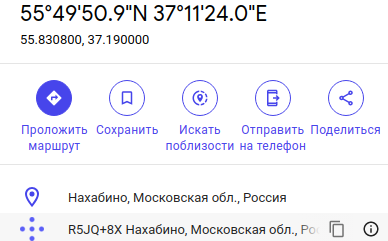

In [271]:
df['tstamp']=df['tstamp'].astype('datetime64[ms]')

In [272]:
df.head(2)

,lac,cid,msisdn,imei,event_type,tstamp,long,lat,max_dist,cell_type,start_angle,end_angle
0,5029,40798,158529599791,3.531111e+14,0,2013-05-22 20:00:00.974,37.9305,55.7815,2101,OUTDOOR,220.0,280.0
1,7782,56870,158520145943,1.292900e+13,5,2013-05-22 20:00:01.396,37.4239,55.7426,2,OUTDOOR,45.0,105.0


### Facts.xlsx obsing

In [273]:
facts = pd.read_excel('facts.xlsx',header=None)
facts.columns=['first','second']

In [274]:
facts.head(2)

,first,second
0,158530067653,158528861653
1,158510912201,158528852857


__Добавим в датафрэйм facts колонку с imei кодами закрепленным за номерами телефонов__

In [275]:
new_list=[]
for i in facts.values:
    buff_list=[]
    new_imei=df[df.msisdn==i[0]].imei.unique()
    new_imei = np.append(new_imei, df[df.msisdn==i[1]].imei.unique())
    for item in new_imei:
        if not np.isnan(item):
            buff_list.append(item)
    new_list.append(buff_list)
facts['imei'] = new_list

__Посмотрим, имеются ли пересечения между imei, у разных персон__

In [276]:
# так как данных мало, можно все перебрать итеративно, без pandas

all_imeis = facts.imei.values.tolist()
for index, imei_list in enumerate(all_imeis):
    for imei in imei_list:
        try:
            imei_bag = list(itertools.chain.from_iterable(all_imeis[index+1:]))
            if imei in imei_bag:
                print(f'{index}th person {imei} gots duplicate', end= ' | ')
                for i in imei_bag:
                    if imei_bag.index(imei) == 0:
                        print(f'duplicate is: {index + 1}th person')
                        break
                    else:
                        print(f'duplicate is: {imei_bag.index(imei)//2 + index}th person')
                        break
        except:
            print('list ends')

16th person 13002009002790.0 gots duplicate | duplicate is: 17th person
29th person 352012080850010.0 gots duplicate | duplicate is: 49th person


__Получается, что среди размеченных данных из файла Facts, имеются разные персоны, один из их телефонов которых имеют общий imei. Опираясь на определение imei и уточнение со стороны постановщика задачи делаем вывод, что это все таки один человек, одна персона. Объеденим их.__

In [277]:
facts.loc['16'] = [158528850493,[158524011021, 158530004641],[13002009002790.0, 13332008243810.0]]
facts.loc['29'] = [[158515886411, 158508828513],[158515729817, 158508828521],[352012080850010.0, 354770046945210.0, 864653011005500.0]]


In [278]:
facts.drop([16,17,29,49],inplace=True)
facts.index = list(range(120))
phone_nums = list(facts[['first','second']].values[:-2])

In [279]:
phone_nums.append(facts[['first','second']].values[-2:][0][1] + [facts[['first','second']].values[-2:][0][0]])
phone_nums.append(facts[['first','second']].values[-2:][1][1] + facts[['first','second']].values[-2:][1][0])

In [280]:
facts['phone_nums'] = phone_nums
facts.drop(['first', 'second'], axis = 1, inplace=True)
all_imeis = facts.imei.values.tolist()
for index, i in enumerate(all_imeis):
    if len(set(i)) < len(i):
        facts.drop([index],inplace=True)
        facts.loc[str(index)] =  [list(set(i)),phone_nums[index]]
        facts.index = list(range(len(phone_nums)))
all_imeis = facts.imei.values.tolist()

In [281]:
imei_dict = {}
for index, value in enumerate(all_imeis):
    try:
        for imei in value:
            imei_dict[imei]=index
    except:
        print(imei)

In [282]:
df['target'] = df.target.apply(lambda row: int(imei_dict[row]) if row in imei_dict.keys() else None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9e8c44898>,
      dtype=object)

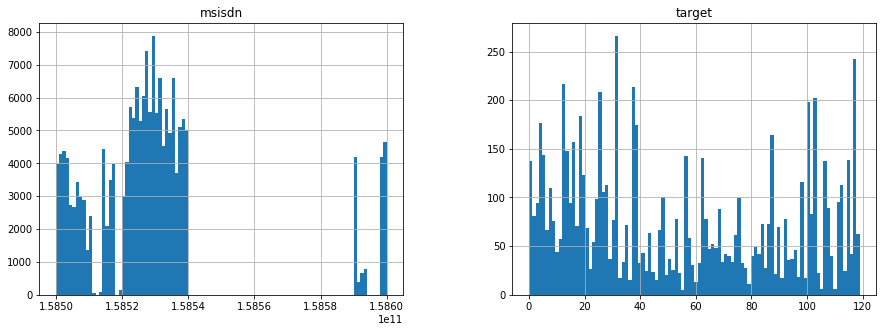

In [283]:
df[['msisdn', 'target']].hist(bins = 100, figsize = (15,5))

__Чекнем есть ли неразмеченные строки в df и подберем их__

In [284]:
uniq_numbers_df=df.msisdn.unique()
new_dict={}
for i in uniq_numbers_df:
    if len(df[df.msisdn==i].target.unique())>1 and np.isnan(df[df.msisdn==i].target.unique().sum()):
        foo = [x for x in df[df.msisdn==i].target.unique() if str(x)!='nan']
        new_dict[i]=foo[0]

In [285]:
for i in new_dict.keys():
    df['target'] = df.apply(lambda row: target_setter(row, i), axis=1)

__8222 размеченных строк из 174к__

In [286]:
df.target.dropna().shape[0]

8222

__Расширим пулл координат, в связи с тем, что часто базовые станции, установлены в одно место , но просто смотрят в разные стороны.__

In [287]:
df.head()

,lac,cid,msisdn,imei,event_type,tstamp,long,lat,max_dist,cell_type,start_angle,end_angle,target
0,5029,40798,158529599791,3.531111e+14,0,2013-05-22 20:00:00.974,37.9305,55.7815,2101,OUTDOOR,220.0,280.0,NaN
1,7782,56870,158520145943,1.292900e+13,5,2013-05-22 20:00:01.396,37.4239,55.7426,2,OUTDOOR,45.0,105.0,NaN
2,7794,32226,158521798391,3.519940e+14,5,2013-05-22 20:00:02.013,37.7034,55.5803,1125,OUTDOOR,0.0,60.0,NaN
3,7758,33528,158537830573,3.586270e+14,0,2013-05-22 20:00:02.331,37.7895,55.7042,1158,OUTDOOR,210.0,270.0,NaN
4,5060,17568,158510204039,3.524581e+14,8,2013-05-22 20:00:03.586,37.1900,55.8308,500,OUTDOOR,180.0,240.0,NaN


In [288]:
df['long'] = df.apply(lambda row: new_coords(row, 'long'), axis = 1)
df['lat'] = df.apply(lambda row: new_coords(row, 'lat'), axis = 1)

__Координаты мы расширили используя градус обзора и максимальное расстояние обзора станции. Сместив каждую точку координат в середину сектора обзора.__

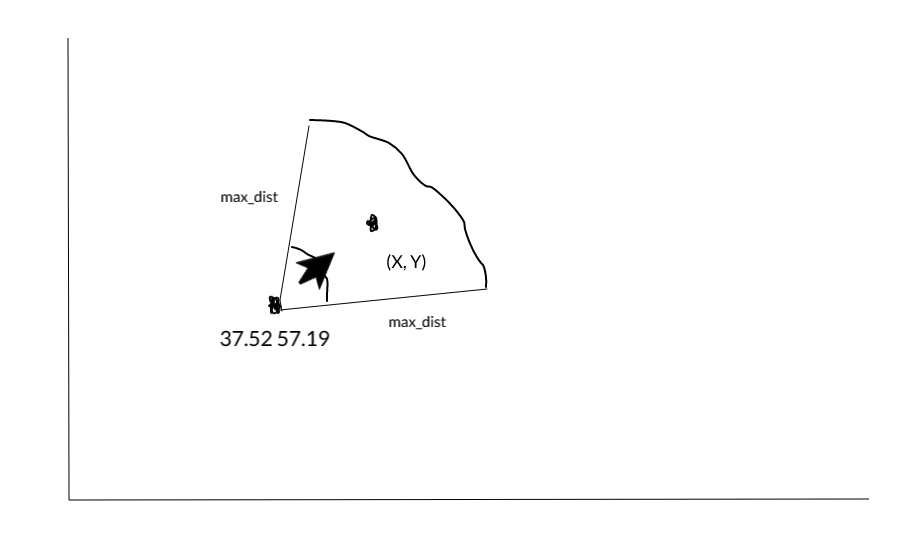

### Попытаемся вывести меру сходства между векторами координат номеров одной персоны

*(опустим часть с подбором метрики сходства)*

In [289]:
supervised_df = df.dropna()
score=[]
for i in range(2, 120):
    uniq_numbers = facts.phone_nums[i]
    if len(uniq_numbers) == 2:
        buff_list_one = supervised_df[supervised_df.msisdn==uniq_numbers[0]][['lat','long']].values.tolist()
        buff_list_two = supervised_df[supervised_df.msisdn==uniq_numbers[1]][['lat','long']].values.tolist()
        buff_list_one = np.append(buff_list_one[0], buff_list_one[1:])
        buff_list_two = np.append(buff_list_two[0], buff_list_two[1:])
        print(f'person {i}')
        #print(f'cosine similarity {cosine_similarity(buff_list_one.reshape(-1,1), buff_list_two.reshape(-1,1)).mean()}')
        print(f'jaccard distance {jaccard_distance(set(buff_list_one), set(buff_list_two))}')
        score.append(jaccard_distance(set(buff_list_one), set(buff_list_two)))
        print()
    elif len(uniq_numbers) > 2:
        res=[]
        for ind in uniq_numbers:
            buff_list = supervised_df[supervised_df.msisdn==ind][['lat','long']].values.tolist()
            res.append(np.append(buff_list[0:2], buff_list[2:]))
        results=[]
        for index, val in enumerate(res):
            try:
                results.append(jaccard_distance(set(val),set(res[index+1])))
            except:
                continue
        score.append(np.array(results).mean())
        print(f'person {i}')
        print(f'jaccard distance {np.array(results).mean()}')
        print()
    elif len(uniq_numbers) < 2:
        print('len == 1, pass')
        print()

person 2
jaccard distance 0.8709677419354839

person 3
jaccard distance 0.9333333333333333

person 4
jaccard distance 0.7906976744186046

person 5
jaccard distance 0.7608695652173914

person 6
jaccard distance 0.8461538461538461

person 7
jaccard distance 1.0

person 8
jaccard distance 0.8983050847457628

person 9
jaccard distance 0.9523809523809523

person 10
jaccard distance 0.9344262295081968

person 11
jaccard distance 0.9565217391304348

person 12
jaccard distance 0.8043478260869565

person 13
jaccard distance 0.8913043478260869

person 14
jaccard distance 0.8666666666666667

person 15
jaccard distance 0.5454545454545454

person 16
jaccard distance 0.8717948717948718

person 17
jaccard distance 0.9574468085106383

person 18
jaccard distance 0.7857142857142857

person 19
jaccard distance 0.9074074074074074

person 20
jaccard distance 0.8378378378378378

person 21
jaccard distance 1.0

person 22
jaccard distance 1.0

person 23
jaccard distance 0.6666666666666666

person 24
jaccard d

__Средний score по 120 персонам. Попробуем применить этот показатель в качестве эвристического параметра для соотношения номеров между собой__

In [290]:
epsilon = np.array(score).mean()
print(epsilon)

0.8481809716326385


### Визуализируем кейс c персоной у которой очень хороший score: 0.25

__Как видим получились плотностные точки, наложенные друг на друга__

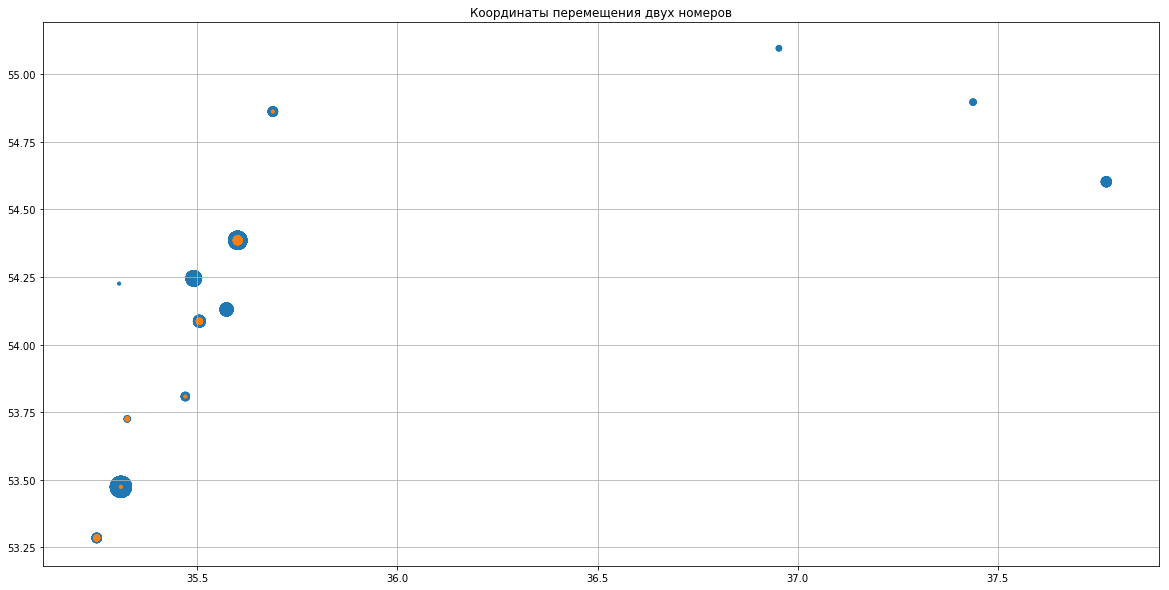

In [291]:
plotter(facts.phone_nums[103][0], facts.phone_nums[103][1])

### Визуализируем кейс c персоной у которой очень плохой score: 1

__Соответственно обратная ситуация видно, что координаты разбросаны друг от друга, маршруты не совпадают, следовательно подобный подход дает оценку близости расположения координат__

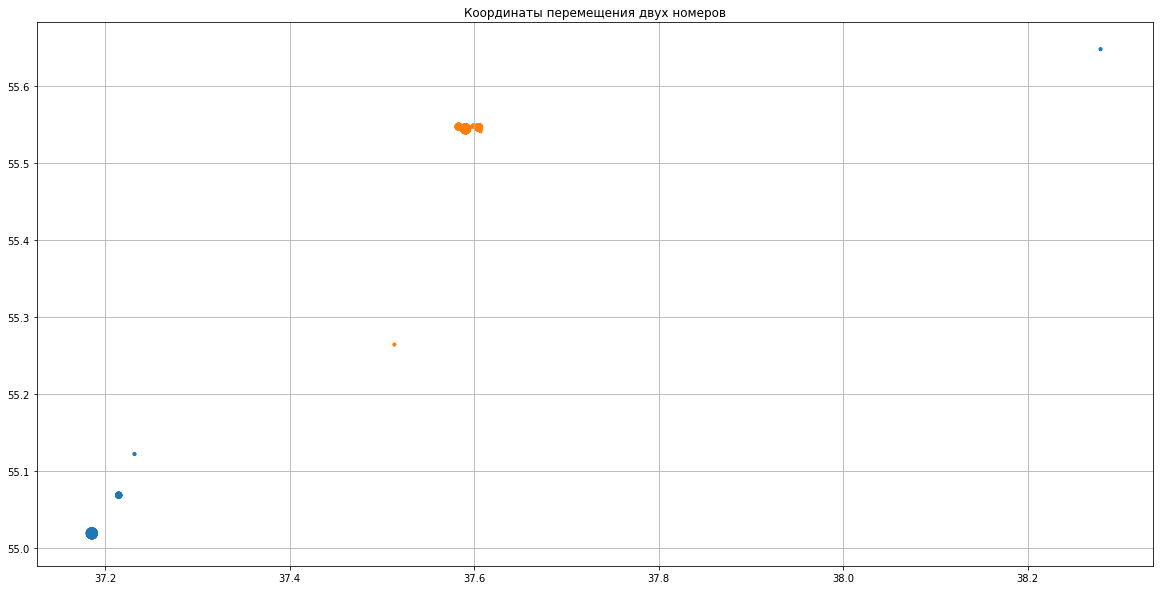

In [292]:
plotter(facts.phone_nums[96][0], facts.phone_nums[96][1])

In [293]:
target_nums = df.msisdn.unique().tolist()
result = []
for index, value in enumerate(target_nums):
    coords = df[df.msisdn==value][['long','lat']].values.tolist()
    coords = np.append(coords[0], coords[1:])
    target = df[df.msisdn==value].target.mean()
    result.append([value, list(coords), target])
target_df = pd.DataFrame(data=result)
target_df.columns = ['number', 'coordinates', 'target']

In [294]:
target_df.head(2)

,number,coordinates,target
0,158529599791,"[37.610296442532125, 54.78099016407388, 37.695...",NaN
1,158520145943,"[37.4235951893789, 55.741647587019585, 37.5222...",NaN


In [295]:
nums = target_df.number.values.tolist()
coords = target_df.coordinates.values.tolist()
target = target_df.target.values.tolist()
overall={}
all_vals=[]
for index, value in enumerate(coords):
    if np.isnan(target[index]):
        for ind, coord in enumerate(coords):
            if ind != index:
                if jaccard_distance(set(value), set(coord)) <= epsilon:
                    key = nums[index]
                    if (key not in overall.keys()) and (nums[ind] not in all_vals):
                        overall[key]=[nums[ind]]
                        all_vals.append(nums[ind])
                    elif (key in overall.keys()) and (nums[ind] not in all_vals):
                        overall[key].append(nums[ind])
                        all_vals.append(nums[ind])
                        
persons={}
all_users=[]

x = 0
for ind, val in enumerate(overall.keys()):
    
    if val not in all_users:
        
        persons[x+120] = [val]
        
        all_users.append(val)
        
        items = overall[val]
        
        for item in items:
            if item not in all_users:
                all_users.append(item)
                persons[x+120].append(item)
                
                try:
                    items_level_2 = overall[item]

                    for item_level_2 in items_level_2:
                        if item_level_2 not in all_users:
                            all_users.append(item_level_2)
                            persons[x+120].append(item_level_2)
                except:
                    continue
        x+=1
                
    

__Окей, подобным эвристически-аналитическим методом получены еще 354 персоны. Казалось бы, можно коммитить. Но не стоит забывать, о ряде допущений, проделанных ранее. Во-первых функция сходства, не использовала плотности встречаемости для координат. Во-вторых, при расчете новых персон не проверялось сходство с уже размеченными персонами. Поэтому, имеющееся число персон, предлагается использовать в виде гиперпараметра в кластерном алгоритме__

In [296]:
persons

{120: [158529599791, 158517454219, 158527388351, 158590531433, 158502911917],
 121: [158537830573,
  158514619431,
  158528740457,
  158503584375,
  158501159927,
  158500129117],
 122: [158528444553, 158537657865, 158501037171],
 123: [158535715927, 158521231333, 158503852881],
 124: [158506271533, 158590304535],
 125: [158514123183, 158503892947, 158507300273, 158531733527],
 126: [158526599127, 158538483063],
 127: [158525274517, 158529920637],
 128: [158590440585, 158514456769],
 129: [158506878509, 158504045501],
 130: [158501294025, 158529434869],
 131: [158598151595, 158514862259, 158503888689, 158537689453, 158532416745],
 132: [158505599515, 158508364921],
 133: [158529476475, 158501500255],
 134: [158530000013, 158527544949],
 135: [158598656609, 158517520405],
 136: [158522914813, 158503174509, 158509346439],
 137: [158517184387, 158598730949],
 138: [158531991853, 158533353117],
 139: [158521301133, 158534549343],
 140: [158533354273, 158522026731],
 141: [158598445843, 158

In [304]:
target_df['new_coordinates'] = target_df.coordinates.apply(lambda row: row[:147] if len(row) > 147 else row + [0] * (147 - (len(row))))

In [321]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [316]:
matrix = target_df.new_coordinates.values.tolist()
matrix = list(matrix)

__В соседнем ноутбуке обучалась агломеративная модель, ее скор получился повыше__

In [393]:
print('aglomerative')
print('0.2429356097039267 360')

aglomerative
0.2429356097039267 360


In [394]:
algo_model = AgglomerativeClustering(n_clusters=360)
algo_labels = algo_model.fit_predict(matrix)

In [395]:
target_df['new_target_algo'] = algo_labels

In [396]:
algo_commit = []
for i in range(max(algo_labels)+1):
    algo_commit.append(target_df[target_df['new_target']==i].number.values.tolist())

In [397]:
with open('algo_predict.txt', 'w') as f:
    for ind, item in enumerate(algo_commit):
        f.write(f"{ind}%s\n" % item)

__KMeans__

In [383]:
fitter('kmeans')

0.18591343319071676 367


In [384]:
model = KMeans(n_clusters=367, n_jobs=-1, random_state=666)
labels = model.fit_predict(matrix)

In [389]:
target_df['new_target'] = labels

In [390]:
commit = []
for i in range(max(labels)+1):
    commit.append(target_df[target_df['new_target']==i].number.values.tolist())

In [391]:
with open('kmeans_predict.txt', 'w') as f:
    for ind, item in enumerate(commit):
        f.write(f"{ind}%s\n" % item)

__Spectral__

*useless*

In [367]:
print("spectral")
print(-0.4081630756375944, 200)

spectral
-0.4081630756375944 200


__Зафиксим разметку полученную от полуподхода, вычисленную через схожести векторов__

In [398]:
foo = facts.phone_nums.values.tolist()
persons_txt = list(persons.values()) + foo
with open('commit.txt', 'w') as f:
    for ind, item in enumerate(persons_txt):
        f.write(f"{ind}%s\n" % item)

## Conclusion

В итоге, к чему мы пришли, что было сделано, что было придумано но не сделано, что придумано сделано, но не отражено в отчете. 

__1__.
Начну пожалуй с того, что сделано, проведен анализ логов базовых станций, на предмет детекции, несколькосимочных и несколькодевайсовых персон. Преобразованы и предобработаны несколько показателей. Получилось раздвинуть координаты, за счет инфы по углу обзора и дальности сигнала. Визуализирован процесс наложения координат при пересечении маршрутов, что предполагается важным показателем схожести номеров. Далее эвристически получен параметр epsilon, параметр, являющийся трешхолдом при детекции схожих номеров. После применения данной эвристики, получено приближенное количество персон, которое использовалось в качестве гиперпараметра для алгоритмов кластеризации (метрикой качества являлся коэффициент силуэта, учитывающий внутриклассовое и межклассовое расстояние). В самом начале анализа датасета, было замечено пару моментов, когда размеченные данные пересекались между собой, поэтому несколько критически отнесясь к разметке я запилил кластеризацию на всех номерах (на случай ошибки, есть commit.txt с сохраненной разметкой facts.xlsx + разметка по схожести)

__2__.
Было пару идей, использовать imei, так как это просто 100% детекция, двухсимочных телефонов, будь побольше времени (которого я бы мог уделить). Я бы обязательно понаходил из хорошо размеченных номеров, его односимочных братьев с таким же imei (было пару попыток, но дальше к сожалению я не пошел). Также не были использованы метаданные о активностях. Которые хорошо показывают периодичность действий и неплохо отражают персону. Отдельно стоит выделить timestamp, используя время можно было сделать времянной ряд и чекать не координаты а присутствие в секторах, которые образуются если учитывать угол и дальность обзора. Тем самым перейти от непрерывных вещественных чисел, к бинарной разметке с частотой записанной как вес показателя.

__3__.
В целом все, спасибо за задачу. Надеюсь в любом случае, вы поделитесь ее правильным решением.